In [1]:
# Import the liberaries
import numpy as np
import matplotlib.image as mp
import matplotlib.pyplot as plt

In [13]:
def align_2dof(input,reference):
    
    # Find the height, width of the input image
    input_height = input.shape[0]
    input_width = input.shape[1]
    
    # Find the height, width of the reference image
    reference_height = reference.shape[0]
    reference_width = reference.shape[1]
    
    # Find the first pixel in the input image which is not 0
    flag = False
    for i in range(input_height):
        for j in range(input_width):
            if input[j][i] != 0:
                x = j
                y = i
                flag = True
                break
        if flag:
            break
    
    # Find the first pixel in the reference image which is not 0
    flag = False
    for i in range(reference_height):
        for j in range(reference_width):
            if reference[j][i] != 0:
                u = j
                v = i
                flag = True
                break
        if flag:
            break
    
    # Calculate the T value in the translation matrix
    Tx = u - x
    Ty = v - y
    
    # Generate the translation matrix
    matrix = np.array([[1, 0, Tx], [0, 1, Ty], [0, 0, 1]])
    
    return(matrix)
    
    
    

In [14]:
def warping_affine(Sx, Rx, Tx, Ry, Sy, Ty, x, y, z, Image):
    
    # Find the height, width of Image_1
    height = Image.shape[0]
    width = Image.shape[1]
    
    # Generate a new height, width of the output image
    new_height = round(abs(height*(3**0.5)/2) + abs(width*0.5)) + 1
    new_width = round(abs(width*(3**0.5)/2) + abs(height*0.5)) + 1
    
    # Generate an array with the new height, width of the output image
    output = np.zeros((new_height, new_width))
    
    # Find the coordinate of Image_1
    original_centre_height = round(((height + 1) / 2) - 1) 
    original_centre_width = round(((width + 1) / 2) - 1)
    
    # Calculate the new coordinate of the output image
    new_centre_height = round(((new_height + 1) / 2 ) - 1)  
    new_centre_width = round(((new_width + 1) / 2) - 1)
    
    # Calculate the output
    for i in range(height):
        for j in range(width):
            #coordinates of pixel with respect to the centre of original image
            y = height - 1 - i - original_centre_height                   
            x = width - 1 - j - original_centre_width                      

            #coordinate of pixel with respect to the rotated image
            new_x = round(x*Sx + y*Rx + Tx)
            new_y = round(x*Ry + y*Sy + Ty)

            '''since image will be rotated the centre will change too, 
               so to adust to that we will need to change new_x and new_y with respect to the new centre'''
            new_x = new_centre_width - new_x
            new_y= new_centre_height - new_y


            # Adding if check to prevent any errors in the processing
            if 0 <= new_x < new_width and 0 <= new_y < new_height and new_x>=0 and new_y>=0:
                output[new_y][new_x]=img1[i][j]
    
    return output

[[  1   0 148]
 [  0   1 144]
 [  0   0   1]]


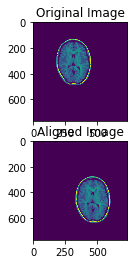

In [16]:
if __name__ == '__main__':
    
    # Read the images
    img1 = mp.imread('img1.jpg')
    img2 = mp.imread('img2.jpg')
    
    # Print the translation matrix
    print(align_2dof(img1,img2))
    
    # Plot the original image
    original_img = warping_affine(1, 0, 0, 0, 1, 0, 0, 0, 1, img1)
    plt.subplot(2,1,1), plt.imshow(original_img)
    plt.title('Original Image')
    
    # Plot the aligned with the translation matrix
    translation_img = warping_affine(1, 0, -1 * align_2dof(img1,img2)[0][2], 0, 1, -1 * align_2dof(img1,img2)[1][2], 0, 0, 1, img1)
    plt.subplot(2,1,2), plt.imshow(translation_img)
    plt.title('Aligned Image')